In [91]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression



In [92]:
train_data = pd.read_csv('train.csv')
test_data  =pd.read_csv('test.csv')

In [93]:
train_data.columns 

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [94]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [95]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [96]:
X = train_data.describe()


In [97]:
  X.loc['range'] = X.loc['max']-X.loc['min']
X.loc['IQR'] = X.loc['75%']-X.loc['25%']

In [98]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
range,3.000000,1.000000,1.000000,3.000000,40.18000,44.695000,100.000000,56.996900,367.000000,886.000000,976.000000
IQR,2.000000,0.000000,1.000000,1.000000,12.30000,14.395000,30.000000,9.996400,45.000000,186.000000,242.000000


In [99]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [100]:
train_data.isnull().sum().sum()

0

In [101]:
train_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


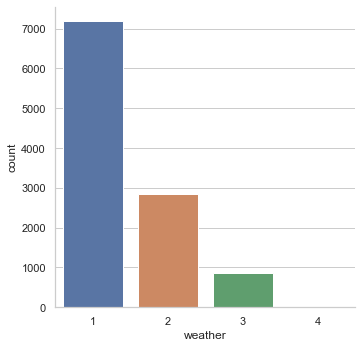

In [102]:
sns.factorplot(x = 'weather',data = train_data,kind ='count',aspect =1)

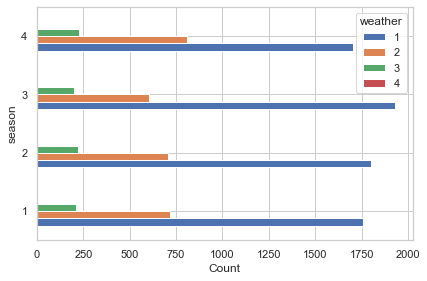

In [103]:
train_data_temp = train_data.groupby(['season','weather']).size().to_frame(name='Count').reset_index()
train_data_temp2 = train_data_temp.pivot(index='season', columns='weather', values='Count')
ax=train_data_temp2.plot(kind='barh')
ax.set_xlabel("Count")
plt.show()


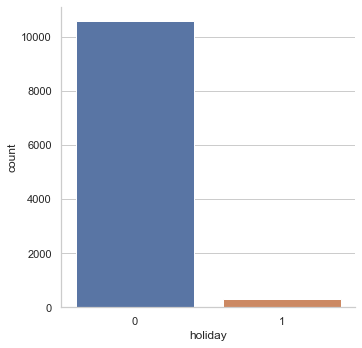

In [104]:

sns.factorplot(x='holiday',data=train_data,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

In [105]:
train_data.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

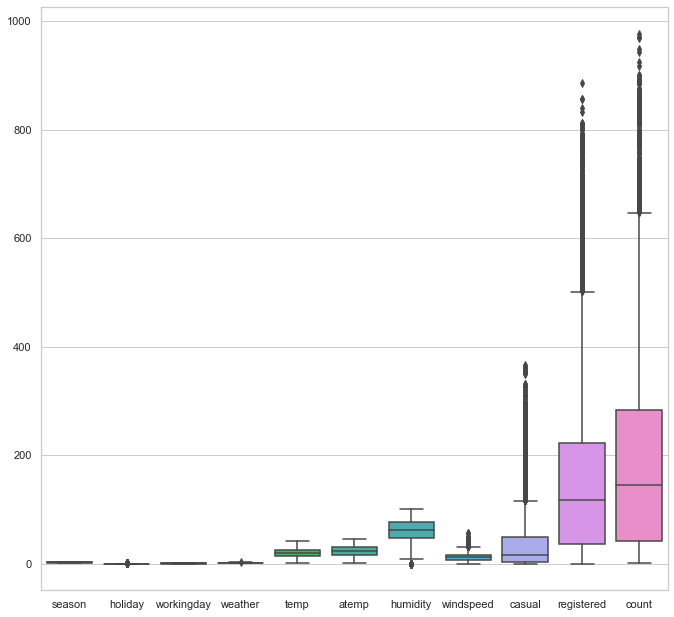

In [106]:
sns.boxplot(data =train_data)
fig=plt.gcf()
fig.set_size_inches(10,10)

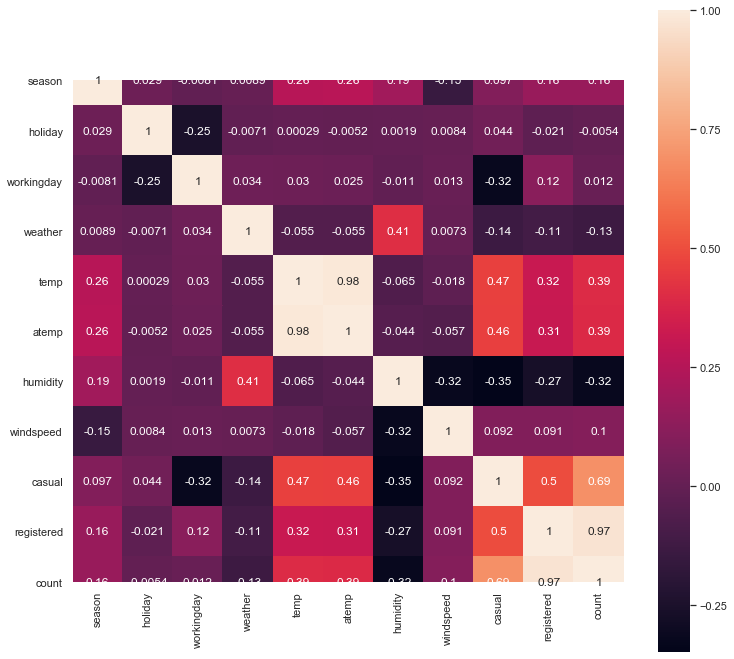

In [107]:
sns.heatmap(train_data.corr(),square=True,annot=True,cbar=True)
fig=plt.gcf()
fig.set_size_inches(11,11)

humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

Also note that weather and count are inversly related. ie as weather icreases(1 to 4) it implies that weather is getting more worse and so lesser people will rent bikes.

registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

In [108]:
train_data.drop(['registered'],axis=1,inplace=True)

In [109]:
season = pd.get_dummies(train_data['season'],prefix ='season')
train_data = pd.concat([train_data,season],axis =1)

In [110]:
train_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,40,1,0,0,0


In [111]:
weather = pd.get_dummies(train_data['weather'],prefix='weather')
train_data = pd.concat([train_data,weather],axis =1)

In [112]:
train_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,40,1,0,0,0,1,0,0,0


In [113]:
#splitting date time to hour day month year just to check any of this features improves the model

In [114]:
train_data["hour"] = [t.hour for t in pd.DatetimeIndex(train_data.datetime)]
train_data["day"] = [t.dayofweek for t in pd.DatetimeIndex(train_data.datetime)]
train_data["month"] = [t.month for t in pd.DatetimeIndex(train_data.datetime)]
train_data["year"] = [t.year for t in pd.DatetimeIndex(train_data.datetime)]

In [115]:
train_data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,1,0,0,0,0,5,1,2011


In [116]:
list = ['datetime','season','weather']


In [117]:
train_data = train_data.drop(list,axis=1)

In [118]:
train_data

,holiday,workingday,temp,atemp,humidity,windspeed,casual,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0000,3,16,1,0,0,0,1,0,0,0,0,5,1,2011
1,0,0,9.02,13.635,80,0.0000,8,40,1,0,0,0,1,0,0,0,1,5,1,2011
2,0,0,9.02,13.635,80,0.0000,5,32,1,0,0,0,1,0,0,0,2,5,1,2011
3,0,0,9.84,14.395,75,0.0000,3,13,1,0,0,0,1,0,0,0,3,5,1,2011
4,0,0,9.84,14.395,75,0.0000,0,1,1,0,0,0,1,0,0,0,4,5,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,7,336,0,0,0,1,1,0,0,0,19,2,12,2012
10882,0,1,14.76,17.425,57,15.0013,10,241,0,0,0,1,1,0,0,0,20,2,12,2012
10883,0,1,13.94,15.910,61,15.0013,4,168,0,0,0,1,1,0,0,0,21,2,12,2012
10884,0,1,13.94,17.425,61,6.0032,12,129,0,0,0,1,1,0,0,0,22,2,12,2012


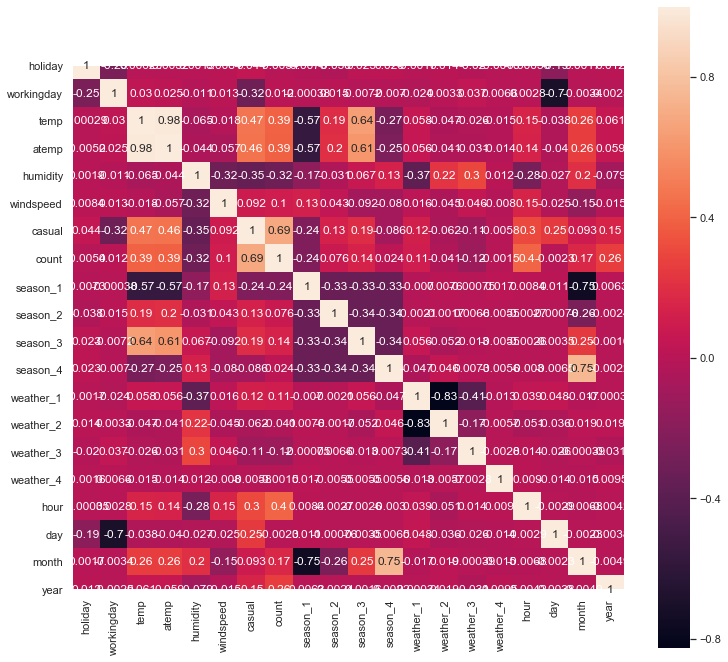

In [119]:
sns.heatmap(train_data.corr(),square=True,annot=True,cbar=True)
fig=plt.gcf()
fig.set_size_inches(11,11)

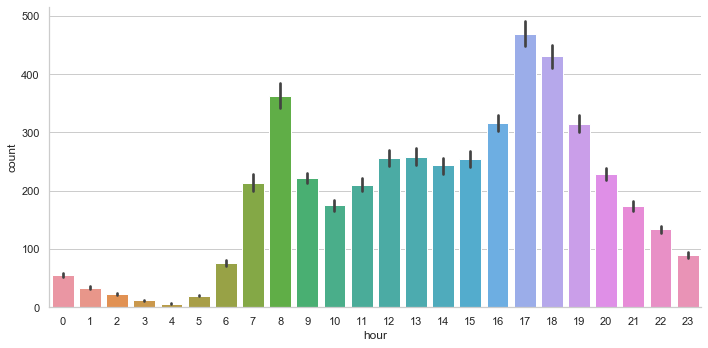

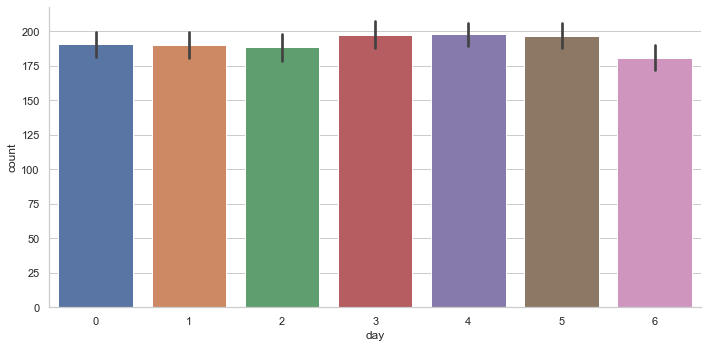

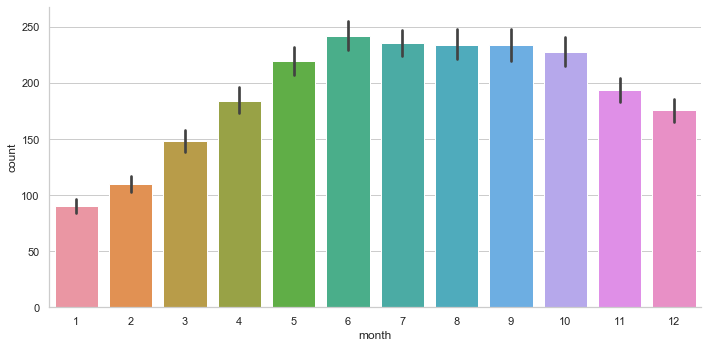

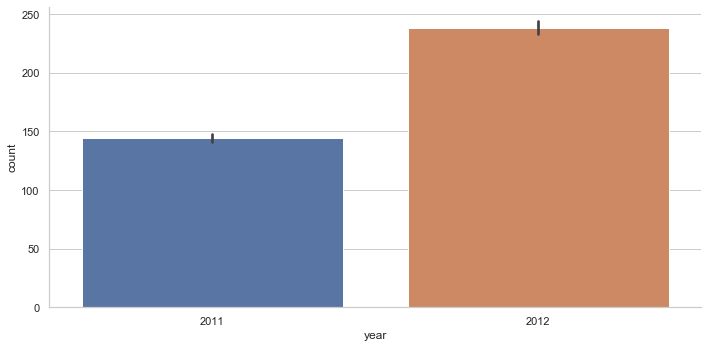

In [120]:
sns.factorplot(x ='hour',y='count',data =train_data,kind='bar',size=5,aspect=2)
sns.factorplot(x ='day',y='count',data =train_data,kind='bar',size=5,aspect=2)
sns.factorplot(x ='month',y='count',data =train_data,kind='bar',size=5,aspect=2)
sns.factorplot(x ='year',y='count',data =train_data,kind='bar',size=5,aspect=2)

In [121]:

from sklearn.model_selection import train_test_split


In [122]:
X_train,X_test,Y_train,Y_test = train_test_split(train_data.drop('count',axis=1),train_data['count'],test_size=0.3)
                                            

In [123]:
models=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor()]
model_names=['LinearRegression','RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor']
rmse=[]
Score=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,Y_train)
    test_pred=clf.predict(X_test)
    Score.append(clf.score(X_train,Y_train))
    rmse.append(np.sqrt(mean_squared_error(test_pred,Y_test)))
d={'Modelling Algorithm':model_names,'Score':Score,'RMSE':rmse}


In [124]:


dd=pd.DataFrame(d,index=[1,2,3,4,5])
dd


,Modelling Algorithm,Score,RMSE
1,LinearRegression,0.611042,112.520263
2,RandomForestRegressor,0.993549,36.006703
3,AdaBoostRegressor,0.774024,87.579374
4,SVR,-0.047431,184.554882
5,KNeighborsRegressor,0.781079,105.301219


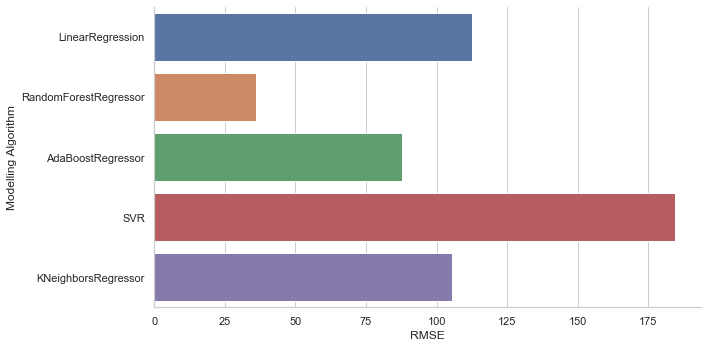

In [125]:
sns.factorplot(y='Modelling Algorithm',x='RMSE',data=dd,kind='bar',size=5,aspect=2)

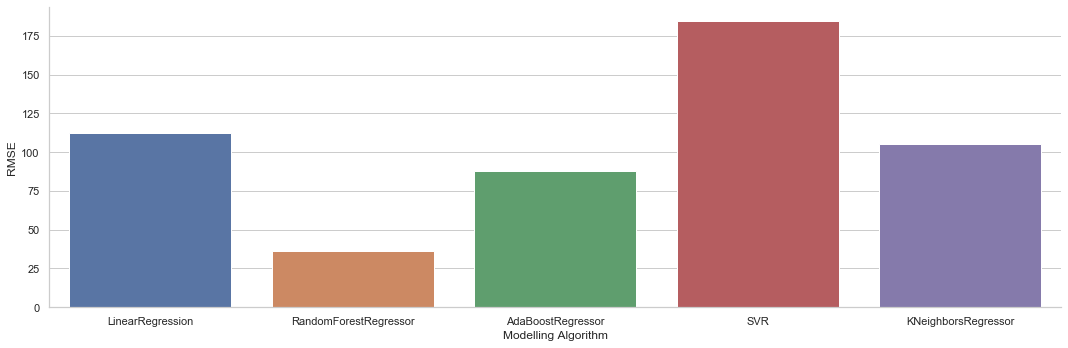

In [126]:
sns.factorplot(x='Modelling Algorithm',y='RMSE',data=dd,kind='bar',size=5,aspect=3)

Tuning the model for better preformance

selection of best hyperparameter for RF

In [127]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   43.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_fea

In [128]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(X_train,Y_train)

In [137]:
models=RandomForestRegressor(max_depth=8,max_features=10,min_samples_leaf=100,
 min_samples_split=200,
 n_estimators=100)

rmse=[]
Score=[]
clf=models
clf.fit(X_train,Y_train)
test_pred=clf.predict(X_test)
Score.append(clf.score(X_test,Y_test))
rmse.append(np.sqrt(mean_squared_error(test_pred,Y_test)))
print('score : %s  rmse %s'%(Score,rmse))

score : [0.7955182279380538]  rmse [81.0878789434451]


we are getting best predictions for RandomForestRegressor with very less rmse when compare to rest of the models

In [143]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_pred,Y_test))
print('MSE:', metrics.mean_squared_error(test_pred,Y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_pred,Y_test)))
print('Mslr:', metrics.mean_squared_log_error(test_pred,Y_test))
print('r2_score:', metrics.r2_score(test_pred,Y_test))



MAE: 53.456226701405164
MSE: 6575.244111546807
RMSE: 81.0878789434451
Mslr: 0.3118223051722271
r2_score: 0.6838112200413251
